In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Collection

In [14]:
file_path = "/content/drive/MyDrive/DS-Lab-CS21B2018/user_data.csv"
user_df = pd.read_csv(file_path)
user_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [15]:
print("Total size:", len(user_df))

Total size: 400


# Data Analysing

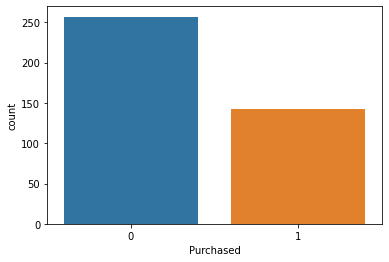

In [5]:
sns.countplot(x='Purchased', data=user_df)

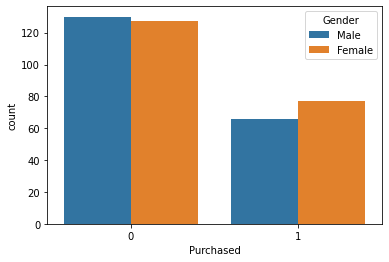

In [6]:
sns.countplot(x='Purchased', hue='Gender', data=user_df)

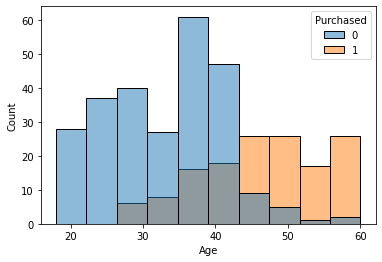

In [7]:
sns.histplot(x='Age', hue='Purchased', data=user_df)

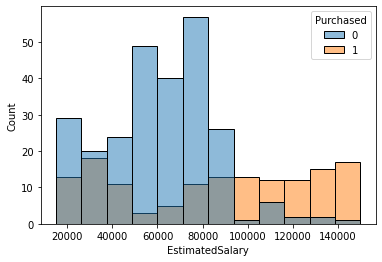

In [8]:
sns.histplot(x='EstimatedSalary', hue='Purchased', data=user_df)

In [9]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Data Wrangling

In [16]:
gender = pd.get_dummies(user_df['Gender'], drop_first=True)
x_user_df = pd.concat([user_df.drop(['User ID', 'Gender'], axis=1), gender], axis=1)
x_user_df

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


# Train and Test Data

In [20]:
x = x_user_df
y = user_df['Purchased']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
y_pred= model.predict(x_test)
print("Predicted result:", y_pred)

Predicted result: [0 1 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1
 1 0 0 0 0 0]


# Performance Analysis

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        31

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [26]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[49  0]
 [ 0 31]]


In [27]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test,y_pred))

Accuracy: 1.0


Text(0.5, 1.0, 'Prediction')

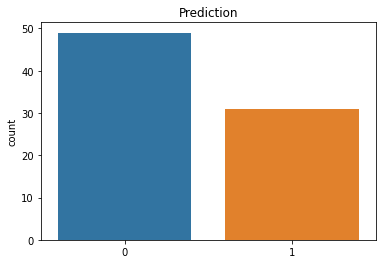

In [28]:
sns.countplot(x=y_pred).set_title('Prediction')

Text(0.5, 1.0, 'Ground Truth')

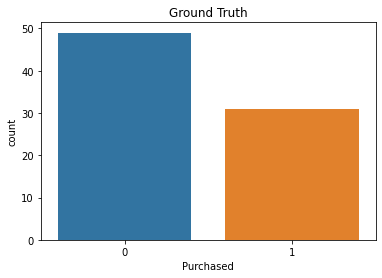

In [29]:
sns.countplot(x=y_test).set_title('Ground Truth')